In [8]:
from arcpy import *                           #import everythings from arcpy libraries.
from arcpy.sa import *                        #import everythings from the ArcGIS Spatial Analyst extension.
from arcpy.ia import Render                   #import rendering function from the ArcGIS Image Analyst extension.                     
import shapefile as shp                       #import shapefile module as alias as shp.
import matplotlib.pyplot as plt 
#from arcpy import *

arcpy.env.workspace = "C:\\Projects\\Topo\\arcpy"
arcpy.env.overwriteOutput = True

grid_dir = "C:\\Temp\\Topo\\lds-nz-150k-tile-index-SHP\\nz-150k-tile-index.shp"

in_dir = "C:\\Temp\\Topo\\TopoBDE00-pre-reblocker\\"
airport_poly  = in_dir + "airport_poly.shp"


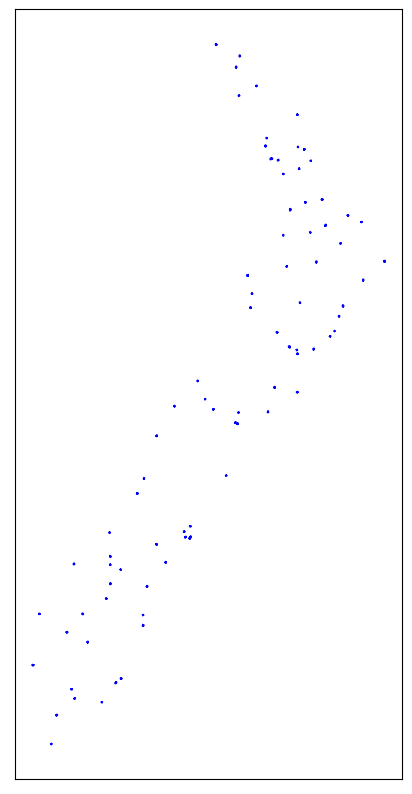

In [4]:
shapefile_to_visualize = airport_poly

# No changes below this line ----------------------------------------------------------
# Visualize the shapefile

fig, ax = plt.subplots(figsize=(5,10))                         #Create a figure and a set of subplots.
ax.ticklabel_format(style='plain')                             #Configure the ScalarFormatter used by default for linear axes.
 
sf = shp.Reader(shapefile_to_visualize)                        #Reading shp file

for s in sf.shapeRecords():                                    #Data bring into list
    for i in range(len(s.shape.parts)):                        
        start = s.shape.parts[i]
        end = len(s.shape.points) if i==len(s.shape.parts)-1 else s.shape.parts[i+1]
            
        x = [i[0] for i in s.shape.points[start:end]]
        y = [i[1] for i in s.shape.points[start:end]]
        ax.plot(x, y, color='blue')                            #Plotting multiple sets of data with maker and color

ax.set_xticks([])
ax.set_yticks([])
plt.show()

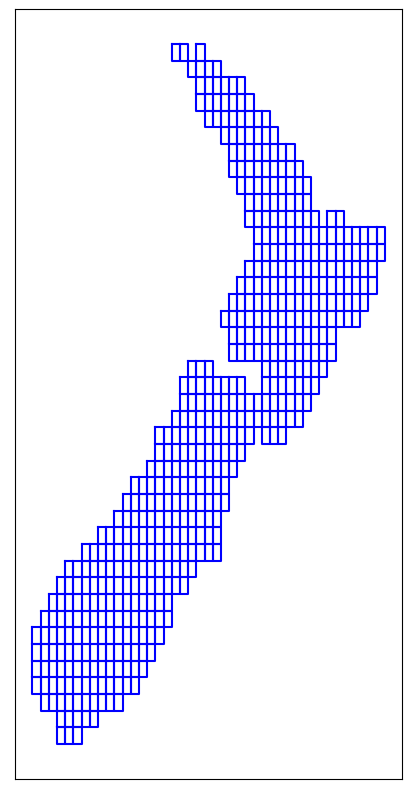

In [9]:
shapefile_to_visualize = grid_dir

# No changes below this line ----------------------------------------------------------
# Visualize the shapefile

fig, ax = plt.subplots(figsize=(5,10))                         #Create a figure and a set of subplots.
ax.ticklabel_format(style='plain')                             #Configure the ScalarFormatter used by default for linear axes.
 
sf = shp.Reader(shapefile_to_visualize)                        #Reading shp file

for s in sf.shapeRecords():                                    #Data bring into list
    for i in range(len(s.shape.parts)):                        
        start = s.shape.parts[i]
        end = len(s.shape.points) if i==len(s.shape.parts)-1 else s.shape.parts[i+1]
            
        x = [i[0] for i in s.shape.points[start:end]]
        y = [i[1] for i in s.shape.points[start:end]]
        ax.plot(x, y, color='blue')                            #Plotting multiple sets of data with maker and color

ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [27]:
arcpy.management.PolygonToLine(grid_dir,"grid_line.shp")

<Result 'C:\\Projects\\Topo\\arcpy\\grid_line.shp'>

In [1]:
import geopandas as gpd
import os

# Set the path to the folder containing shapefiles
folder_path = "C:\\Temp\\Topo\\TopoBDE00-pre-reblocker\\"

# Read all shapefiles in the folder
shapefiles = [gpd.read_file(os.path.join(folder_path, file)) for file in os.listdir(folder_path) if file.endswith('.shp')]

# Set the path to the second shapefile
shapefile_path_2 = "C:\\Temp\\Topo\\lds-nz-150k-tile-index-SHP\\nz-150k-tile-index.shp"

# Read the second shapefile
shapefile_2 = gpd.read_file(shapefile_path_2)

# Add a 1-meter buffer to shapefile_2
shapefile_2['geometry'] = shapefile_2.geometry.buffer(1)

# Process each shapefile in the folder
for shapefile_path in os.listdir(folder_path):
    if shapefile_path.endswith('.shp'):
        shapefile = gpd.read_file(os.path.join(folder_path, shapefile_path))
        
        # Print the fields in the shapefile
        print(shapefile_path)

        # Compare geometries and filter out touched geometries
        touched_geometries = shapefile[shapefile.geometry.apply(lambda geom1: any(geom1.overlaps(geom2) or geom1.touches(geom2) for geom2 in shapefile_2.geometry))]

        # Save the results to a new shapefile with a name derived from the input file name
        input_file_name = os.path.basename(shapefile_path).replace('.shp', '')
        output_path = f"C:\\Temp\\Topo\\outs\\{input_file_name}_f.shp"
        touched_geometries.to_file(output_path)
        break


airport_poly.shp


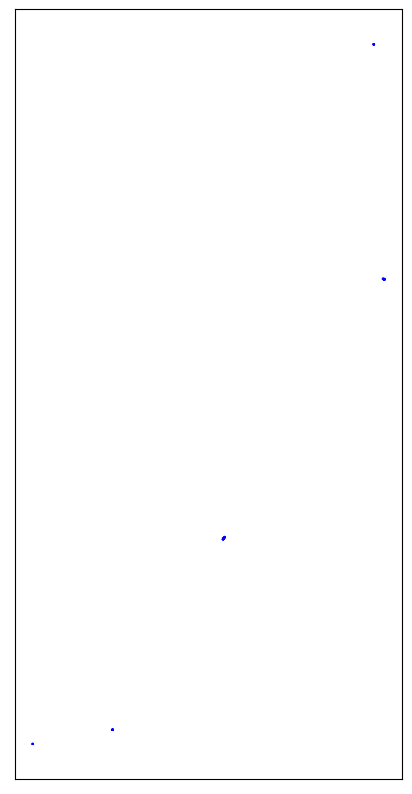

In [4]:
import matplotlib.pyplot as plt
import shapefile as shp     

shapefile_to_visualize = output_path

# No changes below this line ----------------------------------------------------------
# Visualize the shapefile

fig, ax = plt.subplots(figsize=(5,10))                         #Create a figure and a set of subplots.
ax.ticklabel_format(style='plain')                             #Configure the ScalarFormatter used by default for linear axes.
 
sf = shp.Reader(shapefile_to_visualize)                        #Reading shp file

for s in sf.shapeRecords():                                    #Data bring into list
    for i in range(len(s.shape.parts)):                        
        start = s.shape.parts[i]
        end = len(s.shape.points) if i==len(s.shape.parts)-1 else s.shape.parts[i+1]
            
        x = [i[0] for i in s.shape.points[start:end]]
        y = [i[1] for i in s.shape.points[start:end]]
        ax.plot(x, y, color='blue')                            #Plotting multiple sets of data with maker and color

ax.set_xticks([])
ax.set_yticks([])
plt.show()